# Unit 7 | Assignment - Distinguishing Sentiments

## Background

**Twitter** has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose **one** of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

![output_10_0.png](Images/output_10_0.png)

![output_13_1.png](Images/output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* Include a written description of three observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


## Copyright

Data Boot Camp © 2018. All Rights Reserved.



Analysis
1. CNN had the most negative Vader sentiment analysis.
2. The New York Times had a slightly positice score of 0.004191. Even though its score is slightly positive, the New 3. Both the BBC and CBS had an overall positive Vader scores CBS had the highest score with 0.33. the BBC had 0.17.
4. We need a larger sample of tweets, if only a small amount of tweets (100 tweets per users is count as small        amount) its all depends on the daily news happened.

In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
#consumer_secret

'BijdbvkN1YTM9CQyieblSy3ybYrEtQh74vqxBSJ75mferHQTke'

In [3]:
#Get tweets from each news organization's twitter feeds.



# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")
#target_users=["@BBC"]
#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [4]:
news_df=pd.DataFrame(sentiments)
news_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sat Jul 14 19:03:07 +0000 2018,0.000,1.000,0.000,"Tonight, @reginalddhunter takes a 2,000-mile m...",0,@BBC
1,0.3818,Sat Jul 14 18:03:04 +0000 2018,0.000,0.843,0.157,There's a clear difference in the way boys and...,1,@BBC
2,0.8271,Sat Jul 14 17:32:50 +0000 2018,0.000,0.609,0.391,🎾 Angelique Kerber beat seven-time champion Se...,2,@BBC
3,0.6688,Sat Jul 14 16:23:10 +0000 2018,0.000,0.824,0.176,RT @BBCSport: Angelique Kerber is the #wimbled...,3,@BBC
4,0.2714,Sat Jul 14 16:03:05 +0000 2018,0.147,0.621,0.232,"""We'll definitely keep in touch!"" 👋 *Immediat...",4,@BBC


In [16]:
#Export the DataFrame to as csv.

news_df.to_csv("tweet_News_mood.csv", index=False)

<IPython.core.display.Javascript object>


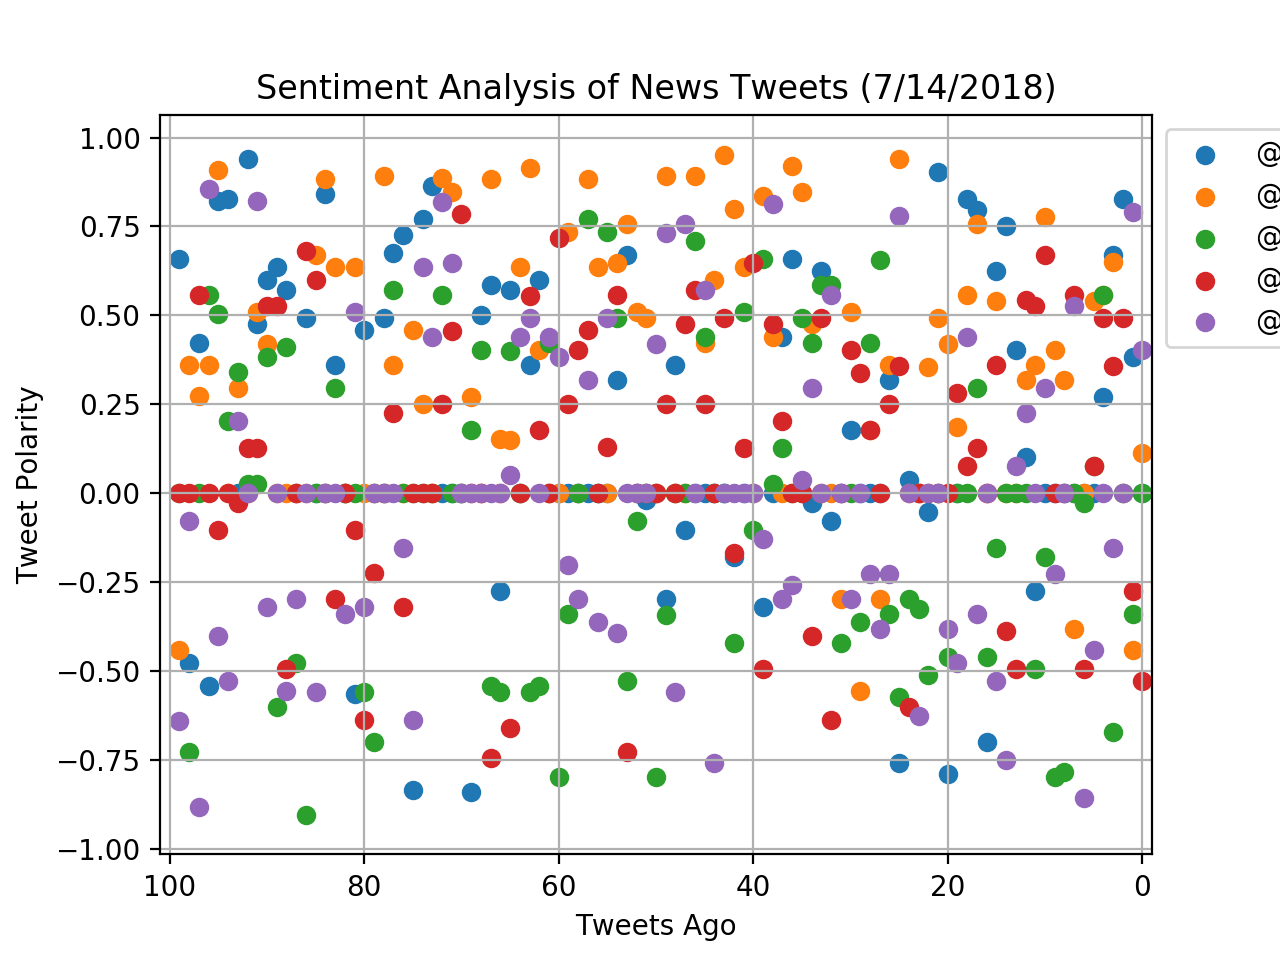

In [17]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    #filter dataframe by news users
    df = news_df.loc[news_df["User"] == user]
    plt.scatter(df["Tweets Ago"],df["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of News Tweets (7/14/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [18]:
average_sentiment = news_df.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.173069
@CBS        0.333588
@CNN       -0.029087
@FoxNews    0.093918
@NYTimes    0.004191
Name: Compound, dtype: float64

<IPython.core.display.Javascript object>


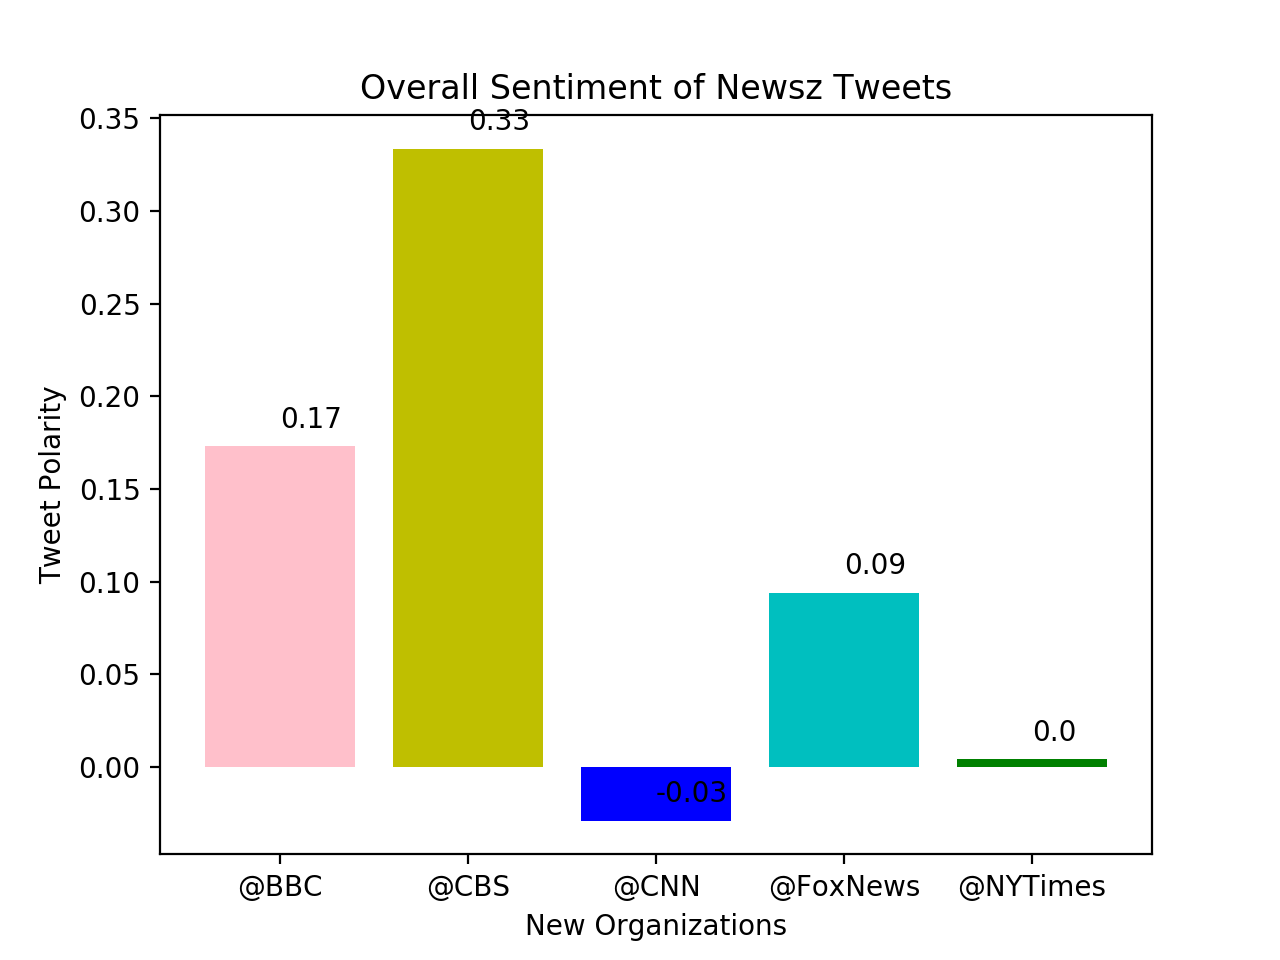

<function matplotlib.pyplot.show>

In [21]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['pink', 'y', 'b', 'c', 'g'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Newsz Tweets")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of News Tweets")
plt.show


Analysis¶
CNN had the most negative Vader sentiment analysis.
The New York Times had a slightly positice score of 0.004191. Even though its score is slightly positive, the New York Times had the scores closes to zero. It is the news outlet with the closest to neutral sentiment.
While both the BBC and CBS had an overall positive Vader scores CBS had the highest score with 0.33. the BBC had 0.17.
The validity of the Vader analysis is questionable. There are tweets of negative events that have neutral Vader scores instead of expected negative Vader scores.
The Vader analysis on news organizations is highly dependent on the type of news happens on a particular day. A more fair analysis would analyze a larger sample of tweets over a larger period of time.